https://cloud.google.com/bigquery/docs/visualize-jupyter?hl=es-419

In [1]:
print('hello world!')

hello world!


Antes de dar el siguiente paso, asegúrese de haber instalado la librería con el comando:  
pip install --upgrade google-cloud-bigquery 

También necesitará db_types

python -m pip install db_dtypes --user

In [2]:
import os
# os.system('pip install google-cloud')
#os.system('pip install google-cloud-bigquery')

%load_ext google.cloud.bigquery

Antes de ejecutar el siguiente Query, debes presentar tus credenciales. Para ello, establece la variable del sistema:  
GOOGLE_APPLICATION_CREDENTIALS = "d:/proyectos/master/bigquery/***.json"

In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "D:/onedrive/proyectos/acc/ignore/bigquerytest-257410-6b2f1b914284.json"

In [4]:
%%bigquery
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

d:\proyectos\python310\lib\site-packages\google\cloud\bigquery\job\query.py:1683: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
d:\proyectos\python310\lib\site-packages\google\cloud\bigquery\table.py:1980: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


In [5]:
%%bigquery total_births
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

d:\proyectos\python310\lib\site-packages\google\cloud\bigquery\job\query.py:1683: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
d:\proyectos\python310\lib\site-packages\google\cloud\bigquery\table.py:1980: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


In [6]:
%matplotlib inline

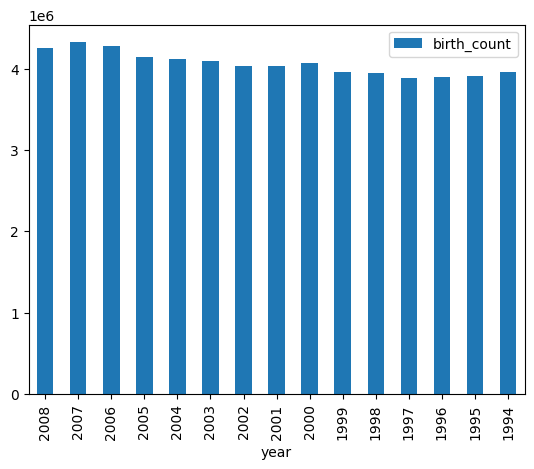

In [7]:
total_births.plot(kind='bar', x='year', y='birth_count');

In [8]:
%%bigquery births_by_weekday
SELECT
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `bigquery-public-data.samples.natality`
WHERE wday IS NOT NULL
GROUP BY wday
ORDER BY wday ASC

d:\proyectos\python310\lib\site-packages\google\cloud\bigquery\job\query.py:1683: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  query_result = wait_for_query(self, progress_bar_type, max_results=max_results)
d:\proyectos\python310\lib\site-packages\google\cloud\bigquery\table.py:1980: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(


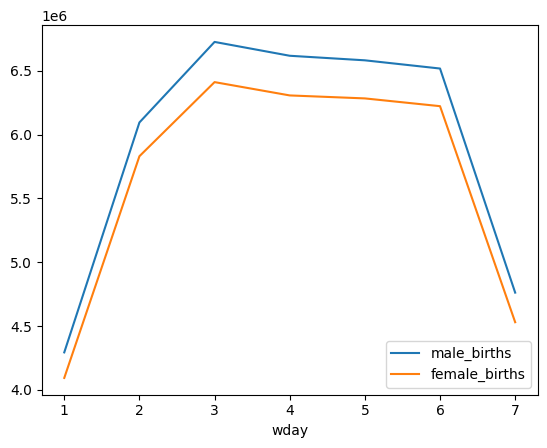

In [9]:
births_by_weekday.plot(x='wday');